In [20]:
import numpy as np
import pandas as pd
import scipy.signal as sig
import matplotlib.pyplot


ModuleNotFoundError: No module named 'ipympl'

In [3]:
valonDf = pd.read_pickle('valonCh2_2480MHz_0dBm_10sScanTime_10ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')

valonDf

,2022-09-12 16:16:23.862503,2022-09-12 16:16:33.921383,2022-09-12 16:16:43.978705,2022-09-12 16:16:54.036653,2022-09-12 16:17:04.093649,2022-09-12 16:17:14.150644,2022-09-12 16:17:24.208537,2022-09-12 16:17:34.265801,2022-09-12 16:17:44.322614,2022-09-12 16:17:54.380743,...,2022-09-12 19:02:21.205243,2022-09-12 19:02:31.262146,2022-09-12 19:02:41.319346,2022-09-12 19:02:51.376523,2022-09-12 19:03:01.433988,2022-09-12 19:03:11.491456,2022-09-12 19:03:21.549841,2022-09-12 19:03:31.607783,2022-09-12 19:03:41.665926,2022-09-12 19:03:51.723236
2.479999e+09,-83.528572,-87.927650,-86.133148,-87.622116,-86.229317,-84.750542,-84.741692,-82.513550,-86.928070,-87.112778,...,-83.204124,-85.598160,-88.408562,-90.198097,-82.961349,-84.777702,-82.771584,-85.621330,-86.748047,-84.695099
2.479999e+09,-84.200020,-86.658333,-92.110062,-91.358444,-85.042427,-86.592415,-82.761055,-87.569321,-87.557854,-89.160332,...,-85.486206,-87.626167,-86.115433,-88.285446,-84.010139,-85.980270,-84.630951,-88.003998,-88.167641,-87.743446
2.479999e+09,-83.406502,-86.130798,-88.068176,-89.026054,-87.089394,-93.747078,-82.332283,-87.475761,-82.238358,-89.057640,...,-90.317558,-86.995193,-87.283951,-84.241982,-84.297829,-88.852425,-84.908607,-88.093086,-95.045151,-83.344177
2.479999e+09,-85.900986,-87.680786,-84.297020,-83.026176,-87.643425,-92.840446,-82.950722,-88.493965,-81.884720,-81.143837,...,-90.209679,-86.443291,-86.219368,-83.498688,-83.168411,-85.244385,-83.695595,-83.670845,-89.762985,-84.512329
2.479999e+09,-86.095512,-86.920746,-84.644562,-81.454597,-87.438126,-86.311615,-86.188087,-89.179932,-84.594254,-81.825859,...,-89.291252,-89.662918,-82.487053,-86.357178,-83.654137,-84.693092,-85.307747,-83.245453,-83.374207,-89.390694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.480000e+09,-86.638672,-84.949600,-82.240761,-85.659523,-87.476784,-84.467369,-84.833862,-80.874306,-85.741119,-81.782722,...,-82.594582,-84.695023,-88.258575,-87.241135,-84.614441,-85.963654,-86.161888,-87.005180,-84.103859,-81.650711
2.480000e+09,-85.208443,-84.909180,-84.955467,-82.904274,-83.697823,-84.300011,-83.286789,-81.903008,-89.015327,-84.680367,...,-82.747192,-80.923012,-84.868172,-86.113480,-85.279068,-85.181610,-85.641380,-85.932549,-83.600258,-80.333450
2.480000e+09,-85.403618,-84.942261,-83.928696,-83.364403,-85.682091,-84.509552,-82.649200,-85.880669,-88.739075,-87.648315,...,-83.796310,-83.499962,-83.667793,-85.911896,-86.218124,-84.258446,-85.375603,-85.222961,-86.529648,-83.070419
2.480000e+09,-88.987534,-84.019257,-82.569984,-82.842415,-83.952644,-85.033264,-85.828453,-80.163353,-87.621056,-85.286606,...,-82.004166,-86.425049,-83.628090,-86.272240,-85.537468,-83.609314,-88.220451,-85.209045,-85.457962,-90.855659


<AxesSubplot:>

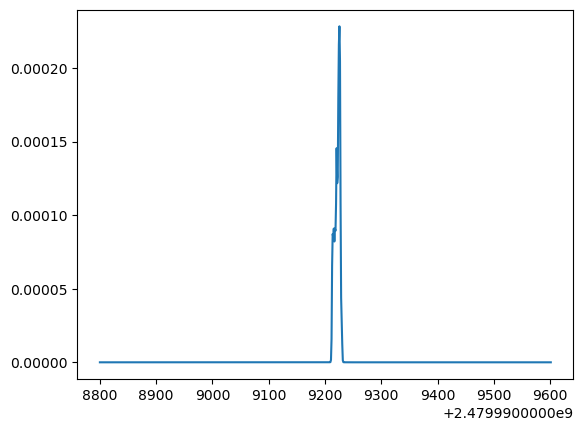

In [19]:
def dbm2watts(dBm):
    watts = 10**((dBm - 30)/10)
    return watts

valonLinDf = valonDf.apply(dbm2watts)
valonLinDf.mean(axis=1).plot()